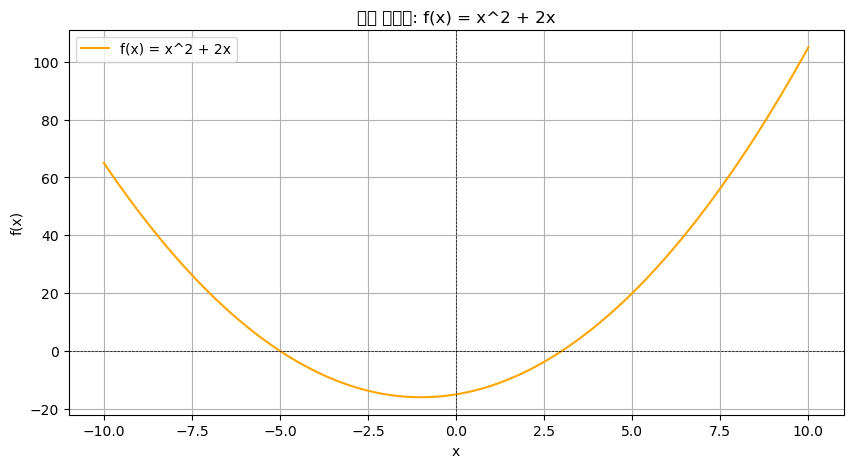

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# x 값 생성
x = np.linspace(-10, 10, 100)
# 함수 정의
y = x**2 + 2*x - 15

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = x^2 + 2x', color='orange')
plt.title('함수 시각화: f(x) = x^2 + 2x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


In [28]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = x**2 + 2*x - 15

# 함수 미분
y_prime = sp.diff(y, x)

# 결과 출력
print(f"함수: y = {y}")
print(f"미분한 결과: y' = {y_prime}")

함수: y = x**2 + 2*x - 15
미분한 결과: y' = 2*x + 2


In [82]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = x**2 + 2*x - 15

# 함수 미분
y_prime = sp.diff(y, x)

# 미분한 식에서 0이 되는 값 찾기
#critical_points = sp.solve(y_prime, x)
sol = solveset(y_prime, x, Interval(-5,13))
#a = sol.evalf()

# 결과 출력
print(f"함수: y = {y}")
print(f"미분한 결과: y' = {y_prime}")
print(f"y' = 0이 되는 x 값: {sol}")

함수: y = x**2 + 2*x - 15
미분한 결과: y' = 2*x + 2
y' = 0이 되는 x 값: {-1}


In [83]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = x**2 + 2*x - 15

# 함수 미분
y_prime = sp.diff(y, x)

# 미분한 식에서 0이 되는 값 찾기
#critical_points = sp.solve(y_prime, x)
sol = solveset(y_prime, x, Interval(-5,13))

# 원래 식에 대입하여 값 계산
function_values = [y.evalf(subs={x: cp}) for cp in sol]

# 결과 출력
print(f"함수: y = {y}")
print(f"미분한 결과: y' = {y_prime}")
print(f"y' = 0이 되는 x 값: {critical_points}")
print(f"원래 식에 대입했을 때의 값: {function_values}")


함수: y = x**2 + 2*x - 15
미분한 결과: y' = 2*x + 2
y' = 0이 되는 x 값: [-1]
원래 식에 대입했을 때의 값: [-16.0000000000000]


### 1-2. 뉴턴법

In [72]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = x**2 + 2*x - 15

# 함수 미분
y_prime = sp.diff(y, x)
# 두 번째 미분
#y_double_prime = sp.diff(y_prime, x)

# 뉴턴법 함수 정의
def newton_method(func, func_prime, initial_guess, tolerance=1e-7, max_iterations=100):
    x_n = initial_guess
    iterations = 0  # 반복 횟수 카운트
    for _ in range(max_iterations):
        iterations += 1
        f_val = func.evalf(subs={x: x_n})
        f_prime_val = func_prime.evalf(subs={x: x_n})
        #f_double_prime_val = func_double_prime.evalf(subs={x: x_n})
        
        # 뉴턴법 공식을 사용하여 다음 추정값 계산
        x_n1 = x_n - f_val / f_prime_val
        
        # 수렴 체크
        if abs(x_n1 - x_n) < tolerance:
            return x_n1, func.evalf(subs={x: x_n1}), iterations
        
        x_n = x_n1
    
    raise ValueError("최대 반복 횟수 초과")

# 초기 추정값 설정
initial_guess = 13

# 최소값 찾기
min_x, min_y, num_iterations = newton_method(y, y_prime, y_double_prime, initial_guess)

# 결과 출력
print(f"최소값은 x = {min_x}, y = {min_y} 입니다.")
print(f"최소값을 찾는 데 사용한 반복 횟수: {num_iterations}회")


최소값은 x = 3.00000000000000, y = 3.55271367880050E-15 입니다.
최소값을 찾는 데 사용한 반복 횟수: 6회


### 1-3. 경사하강법으로 푸시오.

In [2]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = x**2 + 2*x - 15

# 함수 미분
y_prime = sp.diff(y, x)

# 경사하강법 함수 정의
def gradient_descent(func, func_prime, initial_guess, learning_rate=0.01, tolerance=1e-7, max_iterations=1000):
    x_n = initial_guess
    iterations = 0  # 반복 횟수 카운트
    for _ in range(max_iterations):
        iterations += 1
        f_prime_val = func_prime.evalf(subs={x: x_n})
        
        # 경사하강법 공식을 사용하여 다음 추정값 계산
        x_n1 = x_n - learning_rate * f_prime_val
        
        # 수렴 체크
        if abs(x_n1 - x_n) < tolerance:
            return x_n1, func.evalf(subs={x: x_n1}), iterations
        
        x_n = x_n1
    
    raise ValueError("최대 반복 횟수 초과")

# 초기 추정값 설정
initial_guess = 13

# 최소값 찾기
min_x, min_y, num_iterations = gradient_descent(y, y_prime, initial_guess)

# 결과 출력
print(f"최소값은 x = {min_x}, y = {min_y} 입니다.")
print(f"최소값을 찾는 데 사용한 반복 횟수: {num_iterations}회")


최소값은 x = -0.999995118877071, y = -15.9999999999762 입니다.
최소값을 찾는 데 사용한 반복 횟수: 736회


최소값은 x = -0.999999613502205, y = -15.9999999999999 입니다.
최소값을 찾는 데 사용한 반복 횟수: 78회


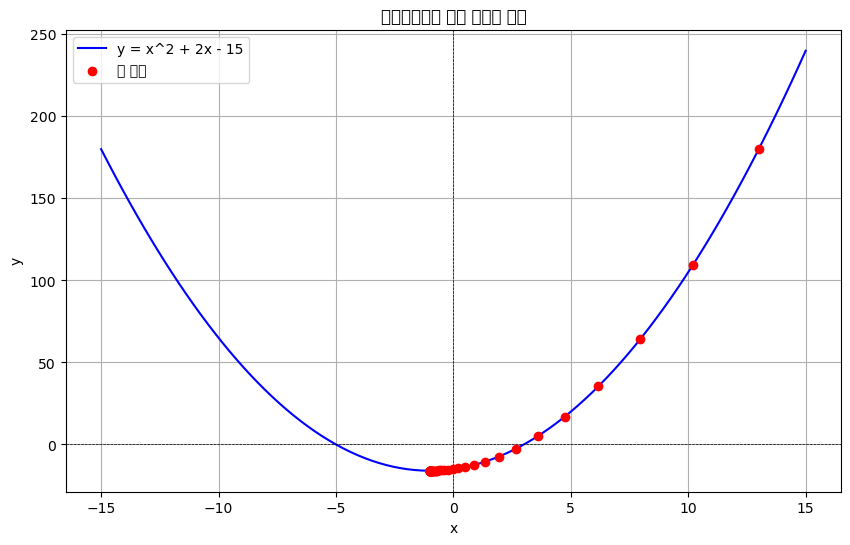

In [92]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = x**2 + 2*x - 15

# 함수 미분
y_prime = sp.diff(y, x)

# 경사하강법 함수 정의
def gradient_descent(func, func_prime, initial_guess, learning_rate=0.1, tolerance=1e-7, max_iterations=100):
    x_n = initial_guess
    iterations = 0  # 반복 횟수 카운트
    path = [x_n]  # 경로 저장
    for _ in range(max_iterations):
        iterations += 1
        f_prime_val = func_prime.evalf(subs={x: x_n})
        
        # 경사하강법 공식을 사용하여 다음 추정값 계산
        x_n1 = x_n - learning_rate * f_prime_val
        
        # 경로 저장
        path.append(x_n1)
        
        # 수렴 체크
        if abs(x_n1 - x_n) < tolerance:
            return x_n1, func.evalf(subs={x: x_n1}), iterations, path
        
        x_n = x_n1
    
    raise ValueError("최대 반복 횟수 초과")

# 초기 추정값 설정
initial_guess = 13

# 최소값 찾기
min_x, min_y, num_iterations, path = gradient_descent(y, y_prime, initial_guess)

# 결과 출력
print(f"최소값은 x = {min_x}, y = {min_y} 입니다.")
print(f"최소값을 찾는 데 사용한 반복 횟수: {num_iterations}회")

# 그래프 시각화
x_vals = np.linspace(-15, 15, 100)
y_vals = [y.evalf(subs={x: val}) for val in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='y = x^2 + 2x - 15', color='b')
plt.scatter(path, [y.evalf(subs={x: val}) for val in path], color='r', label='각 스텝', zorder=5)
plt.title('경사하강법을 통한 최소값 찾기')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


### 새로운 문제

- 2 * sp.sin(x) + 0.5*x
- 초기값 13
- x 범위 : -5 ~ 13

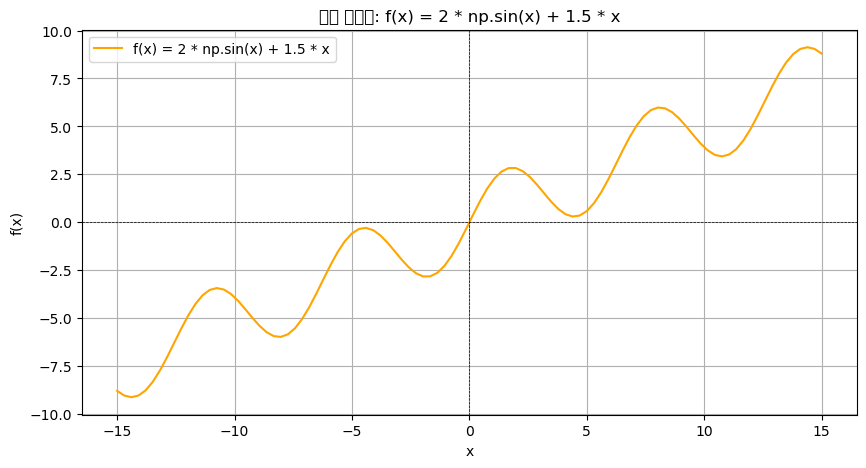

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# x 값 생성
x = np.linspace(-15, 15, 100)
# 함수 정의
y = 2*np.sin(x) + 0.5*x

# 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='f(x) = 2 * np.sin(x) + 1.5 * x', color='orange')
plt.title('함수 시각화: f(x) = 2 * np.sin(x) + 1.5 * x')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


### 1-1. 미분법으로 푸시오.

In [85]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = 2 * sp.sin(x) + 0.5*x

# 함수 미분
y_prime = sp.diff(y, x)

# 미분한 식에서 0이 되는 값 찾기
#critical_points = sp.solve(y_prime, x)
sol = solveset(y_prime, x, Interval(-5,13))


# 원래 식에 대입하여 값 계산
function_values = [y.evalf(subs={x: cp}) for cp in sol]


# 결과 출력
print(f"함수: y = {y}")
print(f"미분한 결과: y' = {y_prime}")
print(f"y' = 0이 되는 x 값: {sol}")
print(f"원래 식에 대입했을 때의 값: {function_values}")


함수: y = 0.5*x + 2*sin(x)
미분한 결과: y' = 2*cos(x) + 0.5
y' = 0이 되는 x 값: {-1.31811607165282 + pi, -1.31811607165282 + 3*pi, 1.31811607165282 - pi, 1.31811607165282 + pi, 1.31811607165282 + 3*pi, -pi - 1.31811607165282}
원래 식에 대입했을 때의 값: [2.84822996407220, 0.293362689517597, 5.98982261766199, -2.84822996407220, 3.43495534310739, -0.293362689517597]


In [87]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = 2 * sp.sin(x) + 0.5 * x

# 함수 미분
y_prime = sp.diff(y, x)

# 두 번째 미분
y_double_prime = sp.diff(y_prime, x)

# 미분한 식에서 0이 되는 값 찾기
sol = sp.solveset(y_prime, x, domain=sp.Interval(-5, 13))

# 원래 식에 대입하여 값 계산
function_values = [y.evalf(subs={x: cp}) for cp in sol]

# 두 번째 미분에 값을 대입하여 최소값 판별
second_derivative_values = [y_double_prime.evalf(subs={x: cp}) for cp in sol]

# 최소값을 찾기 위한 변수 초기화
min_value = float('inf')  # 최소값을 무한대로 초기화
min_x = None  # 최소값의 x 위치

# 각 임계점에서 두 번째 미분을 통해 최소값인지 판별하고, 최소값 찾기
for cp, f_val, second_derivative in zip(sol, function_values, second_derivative_values):
    if second_derivative > 0:  # 두 번째 미분이 양수일 때 최소값
        if f_val < min_value:  # 현재 값이 최소값보다 작으면 업데이트
            min_value = f_val
            min_x = cp

# 결과 출력
if min_x is not None:
    print(f"최소값은 x = {min_x}, y = {min_value}")
else:
    print("최소값을 찾을 수 없습니다.")


최소값은 x = 1.31811607165282 - pi, y = -2.84822996407220


### 1-2. 뉴턴법으로 푸시오.

In [71]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = 2 * sp.sin(x) + 0.5 * x

# 함수 미분
y_prime = sp.diff(y, x)

#초기값
x_0 = 13
Tolerance = 1e-6

i = 0

while True:
    i = i + 1
    
    f_val = y.evalf(subs={x: x_0})
    f_prime_val = y_prime.evalf(subs={x: x_0})
    
    x_1 = x_0 -  ( f_val / f_prime_val )

    f_x_1_val = y.evalf(subs={x: x_1})

    if abs(f_x_1_val - f_val) <= Tolerance:
        break
    x_0 = x_1
    
print('반복 횟수: '+ str(i))
print('근사해: '+ str(x_1))

반복 횟수: 2571
근사해: 1.55112908465944e-20


In [74]:
import sympy as sp

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = 2 * sp.sin(x) + 0.5 * x

# 함수 미분
y_prime = sp.diff(y, x)
# 두 번째 미분
y_double_prime = sp.diff(y_prime, x)

# 뉴턴법 함수 정의
def newton_method(func, func_prime, func_double_prime, initial_guess, tolerance=1e-7, max_iterations=1000000):
    x_n = initial_guess
    iterations = 0  # 반복 횟수 카운트
    for _ in range(max_iterations):
        iterations += 1
        f_val = func.evalf(subs={x: x_n})
        f_prime_val = func_prime.evalf(subs={x: x_n})
        f_double_prime_val = func_double_prime.evalf(subs={x: x_n})
        
        # 뉴턴법 공식을 사용하여 다음 추정값 계산
        x_n1 = x_n - f_val / f_prime_val
        
        # 수렴 체크
        if abs(x_n1 - x_n) < tolerance:
            return x_n1, func.evalf(subs={x: x_n1}), iterations
        
        x_n = x_n1
    
    raise ValueError("최대 반복 횟수 초과")

# 초기 추정값 설정
initial_guess = 13

# 최소값 찾기
min_x, min_y, num_iterations = newton_method(y, y_prime, y_double_prime, initial_guess)

# 결과 출력
print(f"최소값은 x = {min_x}, y = {min_y} 입니다.")
print(f"최소값을 찾는 데 사용한 반복 횟수: {num_iterations}회")


최소값은 x = 0, y = 0 입니다.
최소값을 찾는 데 사용한 반복 횟수: 2572회


### 1-3. 경사하강법으로 푸시오.

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

#미분 값 계산
x = sp.symbols('x')

y = 2 * sp.sin(x) + 0.5*x

y_prime = sp.diff(y, x)
y_prime

2*cos(x) + 0.5

/tmp/ipykernel_3576712/238303509.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([x, x_new], [f1(x), f1(x_new)], 'r--', color='green', linewidth=1)  # 이동 전후 위치 연결


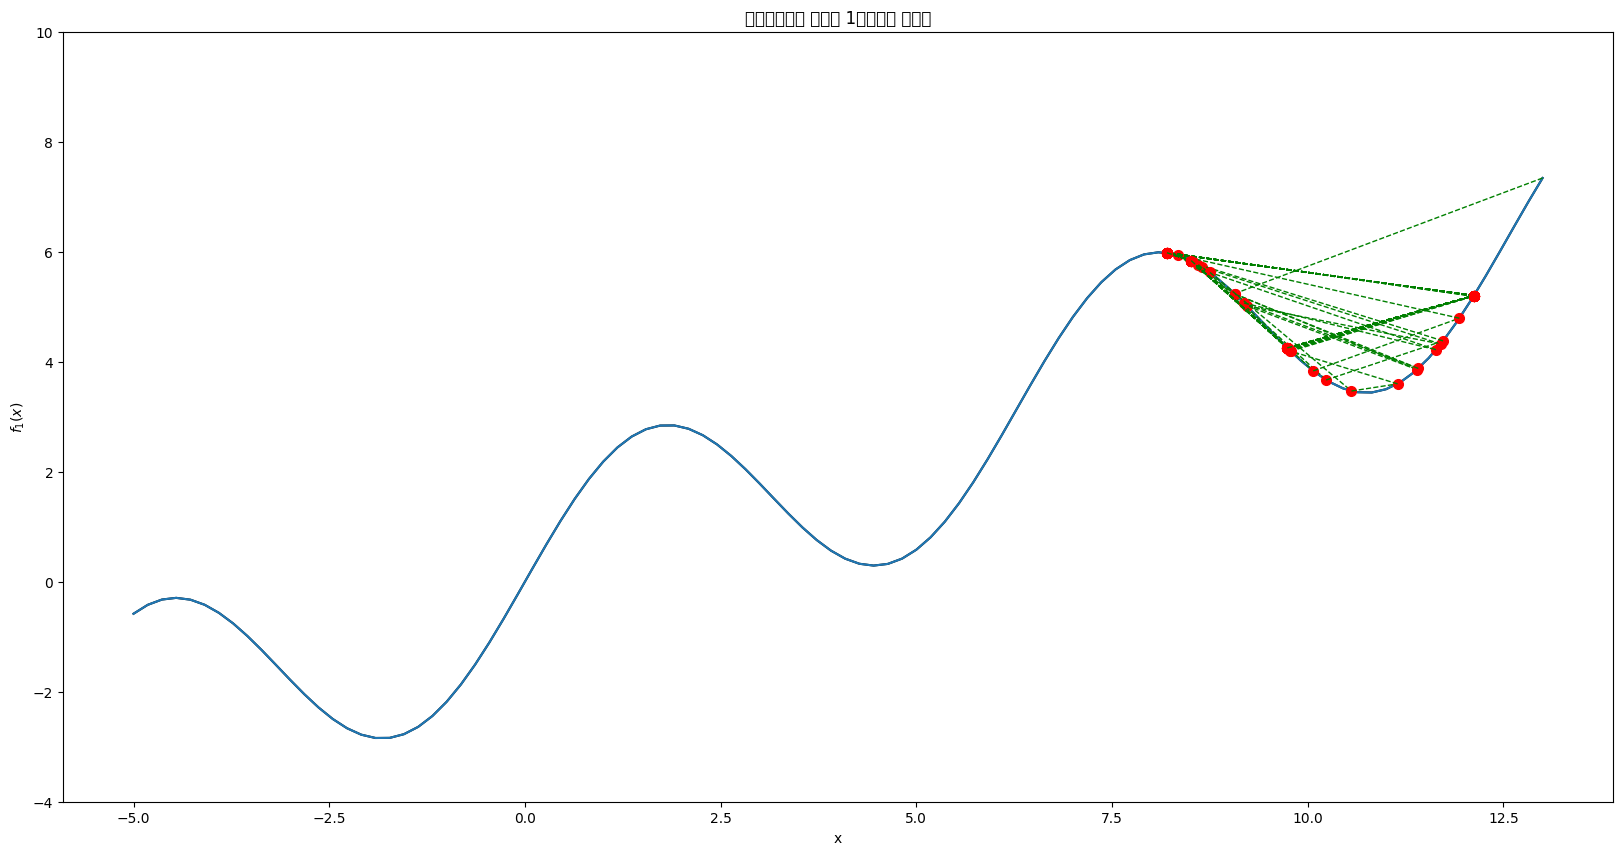

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 2 * np.sin(x) + 0.5 * x

def f1d(x):
    return 2 * np.cos(x) + 0.5

xx = np.linspace(-5, 13, 100)
plt.figure(figsize=(20, 10))
plt.plot(xx, f1(xx), 'k-')
plt.plot(xx, f1(xx))

# step size
mu = 1.7
# 초기값 지정
x = 13

for i in range(100):
    x_new = x - mu * f1d(x)
    plt.plot([x, x_new], [f1(x), f1(x_new)], 'r--', color='green', linewidth=1)  # 이동 전후 위치 연결
    plt.plot(x_new, f1(x_new), 'ro', markersize=7)
    #plt.plot(xx, f1d(x_new) * (xx - x_new) + f1(x_new), 'r--')
    
    x = x_new  # 현재 위치 업데이트

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화")
plt.ylim(-4, 10)
plt.show()


In [7]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# 변수 정의
x = sp.symbols('x')

# 함수 정의
y = 2 * sp.sin(x) + 0.5 * x

# 함수 미분
y_prime = sp.diff(y, x)

# 경사하강법 함수 정의
def gradient_descent(func, func_prime, initial_guess, learning_rate=0.1, tolerance=1e-7, max_iterations=1000000):
    x_n = initial_guess
    iterations = 0  # 반복 횟수 카운트
    path = [x_n]  # 경로 저장
    for _ in range(max_iterations):
        iterations += 1
        f_prime_val = func_prime.evalf(subs={x: x_n})
        
        # 경사하강법 공식을 사용하여 다음 추정값 계산
        x_n1 = x_n - learning_rate * f_prime_val
        
        # 경로 저장
        path.append(x_n1)
        
        # 수렴 체크
        if abs(x_n1 - x_n) < tolerance:
            return x_n1, func.evalf(subs={x: x_n1}), iterations, path
        
        x_n = x_n1
    
    raise ValueError("최대 반복 횟수 초과")

# 초기 추정값 설정
initial_guess = 13
learning_rate = 1.5

# 최소값 찾기
min_x, min_y, num_iterations, path = gradient_descent(y, y_prime, initial_guess, learning_rate)

# 결과 출력
print(f"최소값은 x = {min_x}, y = {min_y} 입니다.")
print(f"최소값을 찾는 데 사용한 반복 횟수: {num_iterations}회")

# 그래프 시각화
x_vals = np.linspace(-15, 15, 100)
y_vals = [y.evalf(subs={x: val}) for val in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='y = x^2 + 2x - 15', color='b')
plt.scatter(path, [y.evalf(subs={x: val}) for val in path], color='r', label='각 스텝', zorder=5)
plt.title('경사하강법을 통한 최소값 찾기')
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black',linewidth=0.5, ls='--')
plt.axvline(0, color='black',linewidth=0.5, ls='--')
plt.legend()
plt.grid()
plt.show()


ValueError: 최대 반복 횟수 초과